In [1]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from config import database_name
from config import user_name
from config import password

In [2]:
conn = psycopg2.connect(host="localhost", port = 5432, database=database_name, user=user_name, password=password)

In [3]:
title_salary_df = pd.read_sql("SELECT e.emp_no, e.emp_title_id, t.title, s.salary \
FROM employees AS e JOIN salaries AS s ON e.emp_no = s.emp_no \
JOIN titles AS t ON e.emp_title_id = t.title_id;", conn)
title_salary_df.head()

,emp_no,emp_title_id,title,salary
0,57444,e0002,Engineer,48973
1,13616,e0003,Senior Engineer,40000
2,240129,e0004,Technique Leader,43548
3,427958,s0001,Staff,63377
4,35916,e0003,Senior Engineer,40000


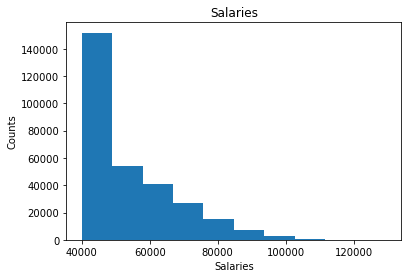

In [4]:
salaries = title_salary_df["salary"]

plt.hist(salaries)
plt.title("Salaries")
plt.xlabel("Salaries")
plt.ylabel("Counts")
plt.show()

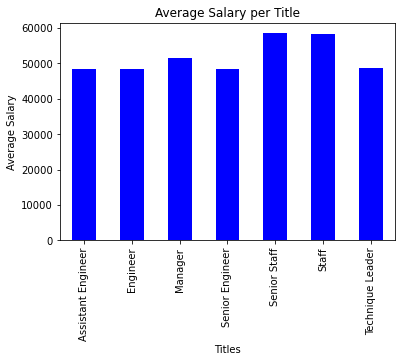

In [5]:
avg_salary_data = title_salary_df.groupby("title")["salary"].mean()

avg_salary_data.plot(kind="bar", facecolor="blue")
plt.title("Average Salary per Title")
plt.ylabel("Average Salary")
plt.xlabel("Titles")
plt.show()

In [6]:
badge_no = 499942
badge_data = pd.read_sql(f"SELECT * FROM employees WHERE emp_no = {badge_no};", conn)
badge_data

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
